In [104]:
#import Library 
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats


# **1- Exploratory data analysis**


In [105]:
#Read data from csv file
df_train = pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [106]:
print('The shape of our training set: ',df_train.shape[0], 'houses', 'and', df_train.shape[1], 'features')
print('The shape of our testing set: ',df_test.shape[0], 'houses', 'and', df_test.shape[1], 'features')
print('The testing set has 1 feature less than the training set, which is SalePrice, the target to predict  ')

The shape of our training set:  1460 houses and 81 features
The shape of our testing set:  1459 houses and 80 features
The testing set has 1 feature less than the training set, which is SalePrice, the target to predict  


In [107]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [108]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


 # Descriptive statistics 

In [109]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [110]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [9]:
#Header name Columns 
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# split training data into numeric and categorical data

In [11]:
numeric = df_train.select_dtypes(exclude='object')
categorical = df_train.select_dtypes(include='object')

In [12]:
print("\nNumber of numeric features : ",(len(numeric.axes[1])))
print("\n", numeric.axes[1])


Number of numeric features :  38

 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [13]:
print("\nNumber of categorical features : ",(len(categorical.axes[1])))
print("\n", categorical.axes[1])


Number of categorical features :  43

 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


## numerical features correlation

In [14]:
# Isolate the numeric features and check his relevance

num_corr = numeric.corr()
table = num_corr['SalePrice'].sort_values(ascending=False).to_frame()
cm = sns.light_palette("green", as_cmap=True)
tb = table.style.background_gradient(cmap=cm)
tb

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


# Correlation Matrix

correlation_train=train.corr()
sb.set(font_scale=2)
plt.figure(figsize = (50,35))
ax = sb.heatmap(correlation_train, annot=True,annot_kws={"size": 25},fmt='.1f',cmap='PiYG', linewidths=.5)

<AxesSubplot:>

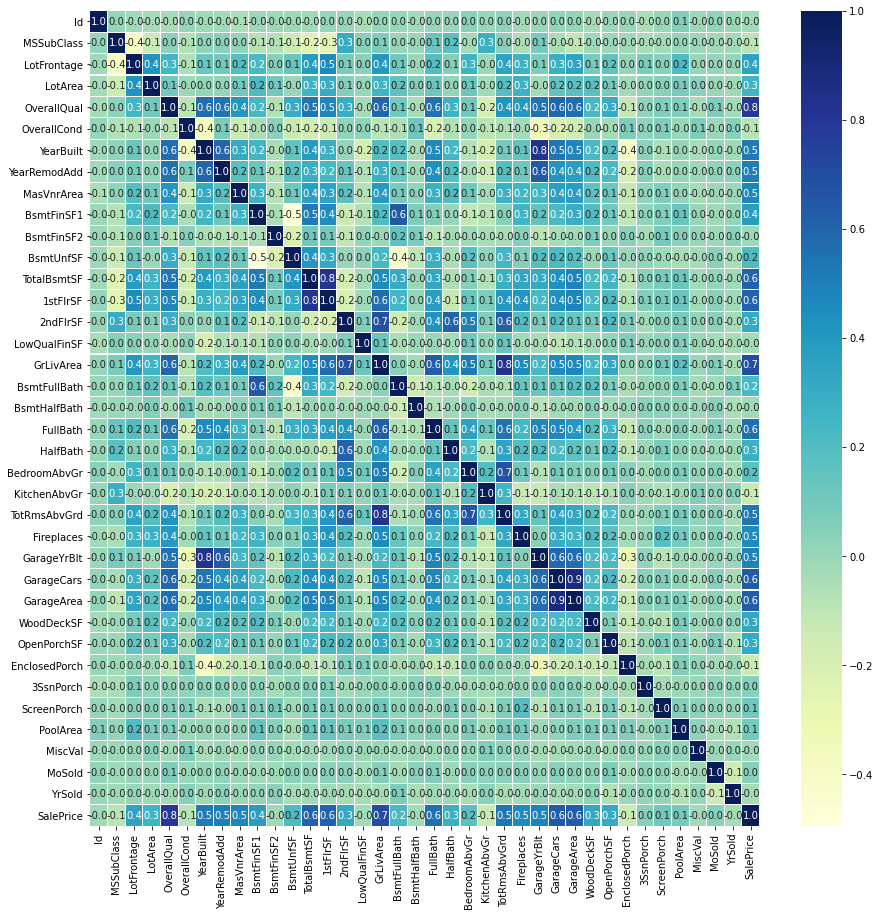

In [15]:

f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_train.corr(),annot=True, linewidths=.1, fmt= '.1f',ax=ax, cmap="YlGnBu")

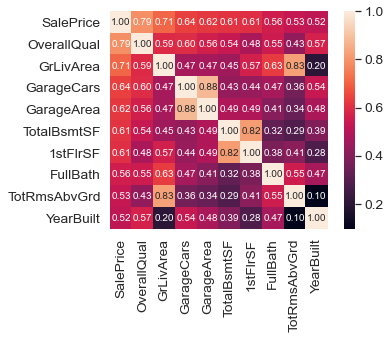

In [16]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = df_train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# scatter plot

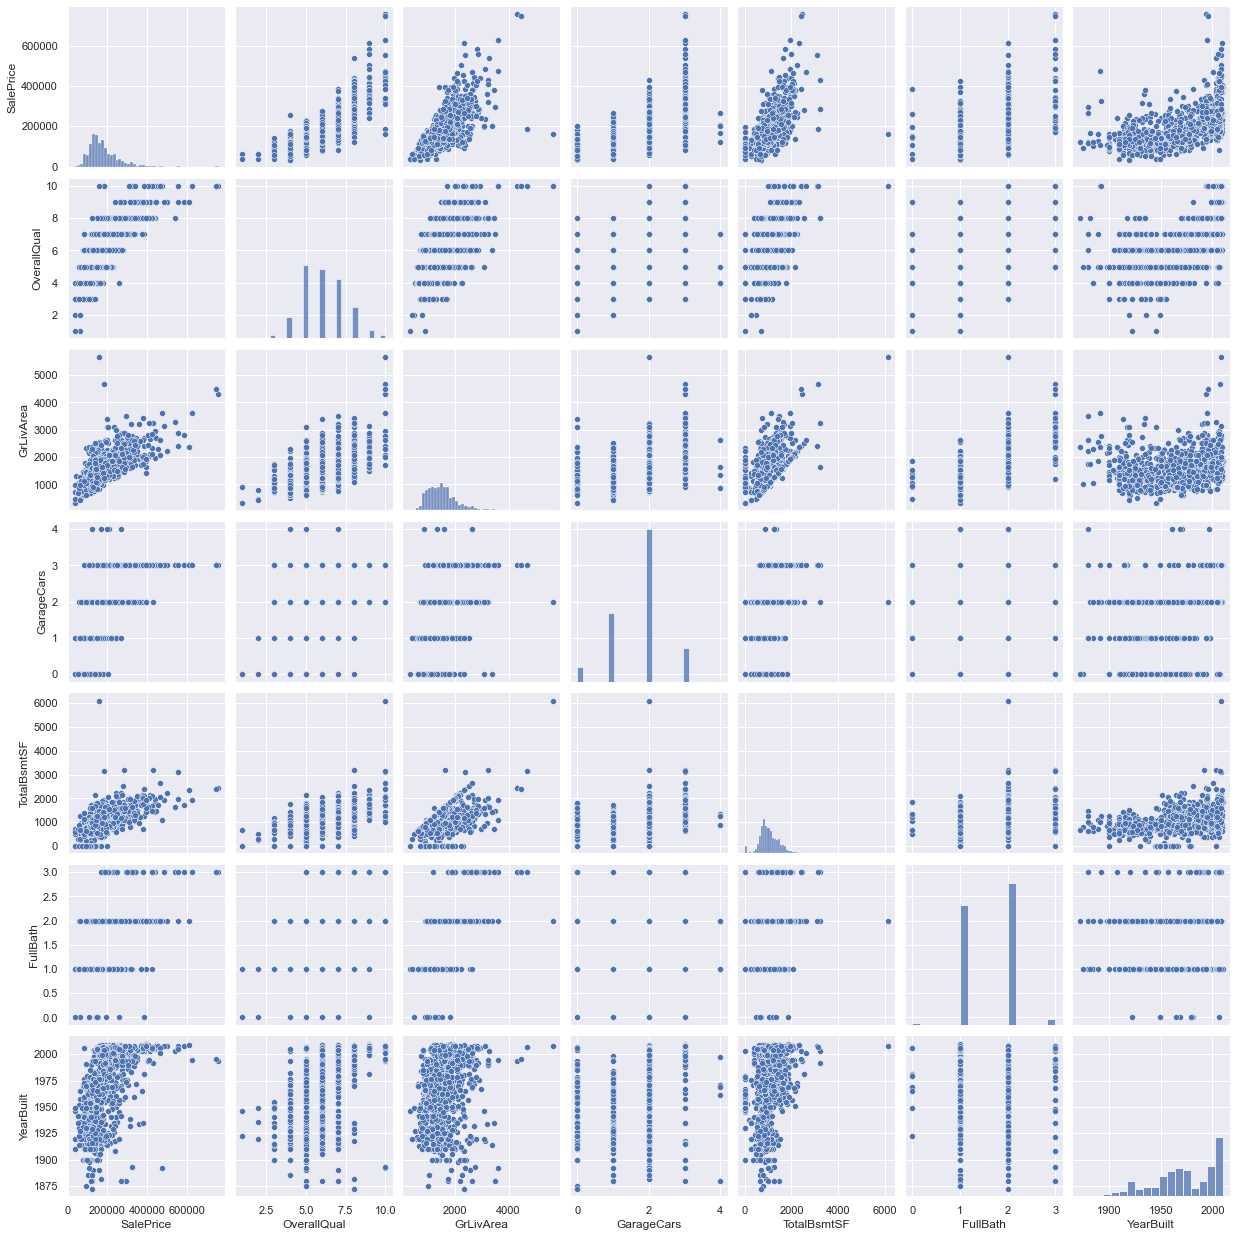

In [17]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

# 2- Data cleaning

In [18]:
#missing data in Traing examples
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


### before the cleaning data we combine training and test data in order to  keep the same structure

Clean and Edit Dataframes
We must combine train and test datasets. Because This processes are must be carried out together

In [19]:
na = df_train.shape[0] #na is the number of rows of the original training set
nb = df_test.shape[0]  #nb is the number of rows of the original test set
y_train = df_train['SalePrice'].to_frame()
#Combine train and test sets
c1 = pd.concat((df_train, df_test), sort=False).reset_index(drop=True)
#Drop the target "SalePrice" and Id columns
c1.drop(['SalePrice'], axis=1, inplace=True)
c1.drop(['Id'], axis=1, inplace=True)
print("Total size for train and test sets is :",c1.shape)

Total size for train and test sets is : (2919, 79)


In [20]:
##msv1 method to visualize missing values per columns
def msv1(data, thresh=20, color='black', edgecolor='black', width=15, height=3): 
    """
    SOURCE: https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking
    """
    
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, 'Columns with more than %s%s missing values' %(thresh, '%'), fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, 'Columns with less than %s%s missing values' %(thresh, '%'), fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()

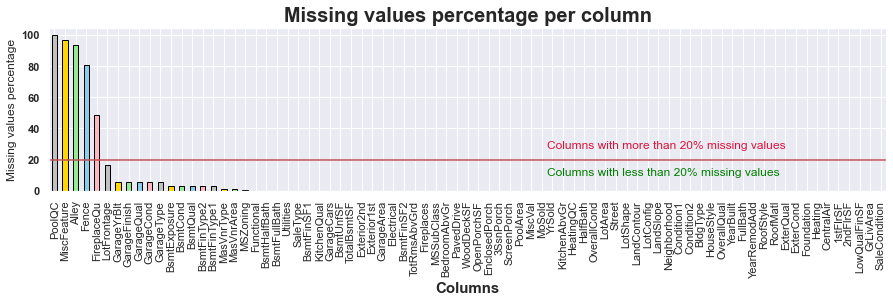

In [21]:
msv1(c1, 20, color=('silver', 'gold', 'lightgreen', 'skyblue', 'lightpink'))

But before going any further, we start by cleaning the data from missing values. I set the threshold to 80% (red line), all columns with more than 80% missing values will be dropped.

First thing to do is get rid of the features with more than 80% missing values (figure above). 
For example the PoolQC's missing values are probably due to the lack of pools in some buildings, which is very logical. But replacing those (more than 80%) missing values with "no pool" will leave us with a feature with low variance, and low variance features are uniformative for machine learning models. So we drop the features with more than 80% missing values.

 Features with >80% missing values , we will drop 

In [22]:
# drop columns (features ) with > 80% missing vales
c=c1.dropna(thresh=len(c1)*0.8, axis=1)
print('We dropped ',c1.shape[1]-c.shape[1], ' features in the combined set')

We dropped  5  features in the combined set


In [23]:
print('The shape of the combined dataset after dropping features with more than 80% M.V.', c.shape)

The shape of the combined dataset after dropping features with more than 80% M.V. (2919, 74)


#  Now what do we do in combine data that contains less than 80% missing values 

In [24]:
allna = (c.isnull().sum() / len(c))*100
allna = allna.drop(allna[allna == 0].index).sort_values()

def msv2(data, width=12, height=8, color=('silver', 'gold','lightgreen','skyblue','lightpink'), edgecolor='black'):
    """
    SOURCE: https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking
    """
    fig, ax = plt.subplots(figsize=(width, height))

    allna = (data.isnull().sum() / len(data))*100
    tightout= 0.008*max(allna)
    allna = allna.drop(allna[allna == 0].index).sort_values().reset_index()
    mn= ax.barh(allna.iloc[:,0], allna.iloc[:,1], color=color, edgecolor=edgecolor)
    ax.set_title('Missing values percentage per column', fontsize=15, weight='bold' )
    ax.set_xlabel('Percentage', weight='bold', size=15)
    ax.set_ylabel('Features with missing values', weight='bold')
    plt.yticks(weight='bold')
    plt.xticks(weight='bold')
    for i in ax.patches:
        ax.text(i.get_width()+ tightout, i.get_y()+0.1, str(round((i.get_width()), 2))+'%',
            fontsize=10, fontweight='bold', color='grey')
    return plt.show()

# Missing values percentage per column with less than 80 % 

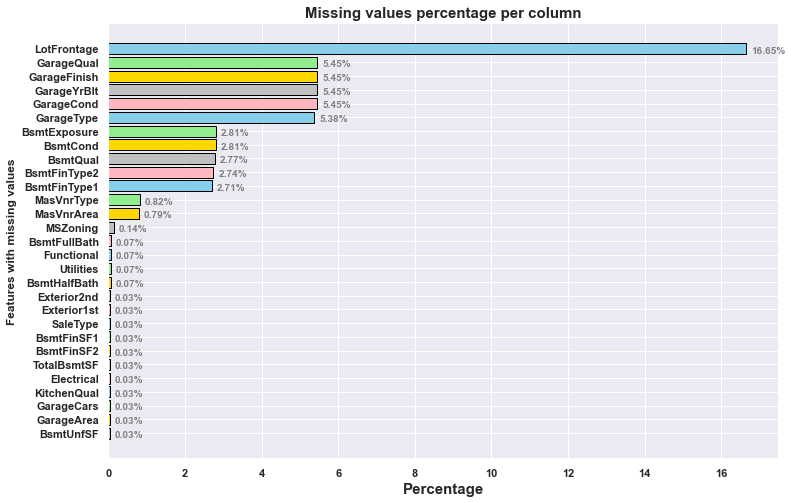

In [25]:
msv2(c)

# Before  compelete cleaning the data, we zoom at the features with missing values, those missing values won't be treated equally. Some features have barely 1 or 2 missing values, we will use the forward fill method to fill them.

 We isolate the missing values from the rest of the dataset to have a good idea of how to treat them 

In [114]:
NA=c[allna.index]

We split them to:

* Categorical features
* Numerical features

In [27]:
NAcat=NA.select_dtypes(include='object')
NAnum=NA.select_dtypes(exclude='object')
print('We have :',NAcat.shape[1],'categorical features with missing values')
print('We have :',NAnum.shape[1],'numerical features with missing values')

We have : 18 categorical features with missing values
We have : 11 numerical features with missing values


So, 18 categorical features and 10 numerical features to clean.

We start with the numerical features, first thing to do is have a look at them to learn more about their distribution and decide how to clean them:
Most of the features are going to be filled with 0s because we assume that they don't exist, for example GarageArea, GarageCars with missing values are simply because the house lacks a garage.
GarageYrBlt: Year garage was built can't be filled with 0s, so we fill with the median (1980).

# Numerical features:

In [28]:
NAnum.head()

,BsmtUnfSF,GarageArea,GarageCars,TotalBsmtSF,BsmtFinSF2,BsmtFinSF1,BsmtHalfBath,BsmtFullBath,MasVnrArea,GarageYrBlt,LotFrontage
0,150.0,548.0,2.0,856.0,0.0,706.0,0.0,1.0,196.0,2003.0,65.0
1,284.0,460.0,2.0,1262.0,0.0,978.0,1.0,0.0,0.0,1976.0,80.0
2,434.0,608.0,2.0,920.0,0.0,486.0,0.0,1.0,162.0,2001.0,68.0
3,540.0,642.0,3.0,756.0,0.0,216.0,0.0,1.0,0.0,1998.0,60.0
4,490.0,836.0,3.0,1145.0,0.0,655.0,0.0,1.0,350.0,2000.0,84.0


In [29]:
NANUM= NAnum.isnull().sum().to_frame().sort_values(by=[0]).T
cm = sns.light_palette("lime", as_cmap=True)

NANUM = NANUM.style.background_gradient(cmap=cm)
NANUM

,BsmtUnfSF,GarageArea,GarageCars,TotalBsmtSF,BsmtFinSF2,BsmtFinSF1,BsmtHalfBath,BsmtFullBath,MasVnrArea,GarageYrBlt,LotFrontage
0,1,1,1,1,1,1,2,2,23,159,486


In [30]:
#MasVnrArea: Masonry veneer area in square feet, the missing data means no veneer so we fill with 0
c['MasVnrArea']=c.MasVnrArea.fillna(0)
#LotFrontage has 16% missing values. We fill with the median
c['LotFrontage']=c.LotFrontage.fillna(c.LotFrontage.median())
#GarageYrBlt:  Year garage was built, we fill the gaps with the median: 1980
c['GarageYrBlt']=c["GarageYrBlt"].fillna(1980)
#For the rest of the columns: Bathroom, half bathroom, basement related columns and garage related columns:
#We will fill with 0s because they just mean that the hosue doesn't have a basement, bathrooms or a garage

In [31]:
bb=c[allna.index.to_list()]
nan=bb.select_dtypes(exclude='object')
N= nan.isnull().sum().to_frame().sort_values(by=[0]).T
cm = sns.light_palette("lime", as_cmap=True)

N= N.style.background_gradient(cmap=cm)
N

,MasVnrArea,GarageYrBlt,LotFrontage,BsmtUnfSF,GarageArea,GarageCars,TotalBsmtSF,BsmtFinSF2,BsmtFinSF1,BsmtHalfBath,BsmtFullBath
0,0,0,0,1,1,1,1,1,1,2,2


#  Categorical features:

And we have 18 Categorical features with missing values:
Some features have just 1 or 2 missing values, so we will just use the forward fill method because they are obviously values that can't be filled with 'None's Features with many missing values are mostly basement and garage related (same as in numerical features) so as we did with numerical features (filling them with 0s), we will fill the categorical missing values with "None"s assuming that the houses lack basements and garages

In [32]:
NAcat.head()

,KitchenQual,Electrical,SaleType,Exterior1st,Exterior2nd,Utilities,Functional,MSZoning,MasVnrType,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtCond,BsmtExposure,GarageType,GarageCond,GarageFinish,GarageQual
0,Gd,SBrkr,WD,VinylSd,VinylSd,AllPub,Typ,RL,BrkFace,GLQ,Unf,Gd,TA,No,Attchd,TA,RFn,TA
1,TA,SBrkr,WD,MetalSd,MetalSd,AllPub,Typ,RL,None,ALQ,Unf,Gd,TA,Gd,Attchd,TA,RFn,TA
2,Gd,SBrkr,WD,VinylSd,VinylSd,AllPub,Typ,RL,BrkFace,GLQ,Unf,Gd,TA,Mn,Attchd,TA,RFn,TA
3,Gd,SBrkr,WD,Wd Sdng,Wd Shng,AllPub,Typ,RL,None,ALQ,Unf,TA,Gd,No,Detchd,TA,Unf,TA
4,Gd,SBrkr,WD,VinylSd,VinylSd,AllPub,Typ,RL,BrkFace,GLQ,Unf,Gd,TA,Av,Attchd,TA,RFn,TA


Number of missing values per column in  Categorical features after the drop missing values with > 80%

In [33]:
NAcat1= NAcat.isnull().sum().to_frame().sort_values(by=[0]).T
cm = sns.light_palette("lime", as_cmap=True)

NAcat1 = NAcat1.style.background_gradient(cmap=cm)
NAcat1

,KitchenQual,Electrical,SaleType,Exterior1st,Exterior2nd,Utilities,Functional,MSZoning,MasVnrType,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtCond,BsmtExposure,GarageType,GarageCond,GarageFinish,GarageQual
0,1,1,1,1,1,2,2,4,24,79,80,81,82,82,157,159,159,159


The table above helps us to locate the categorical features with few missing values.

We start our cleaning with the features having just few missing value (1 to 4): We fill the gap with forward fill method:

In [34]:
fill_cols = ['Electrical', 'SaleType', 'KitchenQual', 'Exterior1st',
             'Exterior2nd', 'Functional', 'Utilities', 'MSZoning']

for col in c[fill_cols]:
    c[col] = c[col].fillna(method='ffill')

In [35]:
dd=c[allna.index.to_list()]
w=dd.select_dtypes(include='object')
a= w.isnull().sum().to_frame().sort_values(by=[0]).T
cm = sns.light_palette("lime", as_cmap=True)

a= a.style.background_gradient(cmap=cm)
a

,KitchenQual,Electrical,SaleType,Exterior1st,Exterior2nd,Utilities,Functional,MSZoning,MasVnrType,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtCond,BsmtExposure,GarageType,GarageCond,GarageFinish,GarageQual
0,0,0,0,0,0,0,0,0,24,79,80,81,82,82,157,159,159,159


We dealt already with small missing values or values that can't be filled with "0" such as Garage year built.
The rest of the features are mostly basement and garage related with 100s of missing values, 
we will just fill 0s in the numerical features and 'None' in categorical features, assuming that the houses don't have basements, full bathrooms or garage

In [36]:
#we will just 'None' in categorical features
#Categorical missing values
NAcols=c.columns
for col in NAcols:
    if c[col].dtype == "object":
        c[col] = c[col].fillna("None")


In [37]:
#we will just fill 0s in the numerical features 
#Numerical missing values
for col in NAcols:
    if c[col].dtype != "object":
        c[col]= c[col].fillna(0)

In [38]:
c.isnull().sum().sort_values(ascending=False).head()

MSSubClass      0
GarageType      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
dtype: int64

In [39]:



FillNA=c[allna.index.to_list()]



FillNAcat=FillNA.select_dtypes(include='object')

FC= FillNAcat.isnull().sum().to_frame().sort_values(by=[0]).T
cm = sns.light_palette("lime", as_cmap=True)

FC= FC.style.background_gradient(cmap=cm)
FC




,KitchenQual,GarageCond,GarageType,BsmtExposure,BsmtCond,BsmtQual,BsmtFinType2,BsmtFinType1,MasVnrType,MSZoning,Functional,Utilities,Exterior2nd,Exterior1st,SaleType,Electrical,GarageFinish,GarageQual
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
FillNAnum=FillNA.select_dtypes(exclude='object')

FM= FillNAnum.isnull().sum().to_frame().sort_values(by=[0]).T
cm = sns.light_palette("lime", as_cmap=True)

FM= FM.style.background_gradient(cmap=cm)
FM



,BsmtUnfSF,GarageArea,GarageCars,TotalBsmtSF,BsmtFinSF2,BsmtFinSF1,BsmtHalfBath,BsmtFullBath,MasVnrArea,GarageYrBlt,LotFrontage
0,0,0,0,0,0,0,0,0,0,0,0


# 3- Feature engineering:

Since the area is a very important variable,
 we will create a new feature "TotalArea"
 that sums the area of all the floors and the basement

 * Bathrooms: All the bathroom in the ground floor
 * Year average: The average of the sum of the year the house was built and the year the house was remodeled

In [41]:
c.shape

(2919, 74)

In [42]:
c['TotalArea'] = c['TotalBsmtSF'] + c['1stFlrSF'] + c['2ndFlrSF'] + c['GrLivArea'] +c['GarageArea']

c['Bathrooms'] = c['FullBath'] + c['HalfBath']*0.5 

c['Year average']= (c['YearRemodAdd']+c['YearBuilt'])/2


Feature engineering is very important to improve the model's performance, I will start in this kernel just with the TotalArea, Bathrooms and average year features and will keep updating the kernel by creating new features

# 4- Encoding categorical features:



### 4.1 Numerical features:
We start with numerical features that are actually categorical, for example "Month sold", the values are from 1 to 12, each number is assigned to a month November is number 11 while March is number 3. 11 is just the order of the months and not a given value, so we convert the "Month Sold" feature to categorical

In [43]:
#c['MoSold'] = c['MoSold'].astype(str)
c['MSSubClass'] = c['MSSubClass'].apply(str)
c['YrSold'] = c['YrSold'].astype(str)

In [44]:
c.shape

(2919, 77)

In [45]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
c['HasBsmt'] = pd.Series(len(c['TotalBsmtSF']), index=c.index)
c['HasBsmt'] = 0 
c.loc[c['TotalBsmtSF']>0,'HasBsmt'] = 1

#transform data
c.loc[c['HasBsmt']==1,'TotalBsmtSF'] = np.log(c['TotalBsmtSF'])

### 4.2 One hot encoding

In [116]:
cb=pd.get_dummies(c)
print("the shape of the original dataset",c.shape)
print("the shape of the encoded dataset",cb.shape)
print("We have ",cb.shape[1]- c.shape[1], 'new encoded features')

the shape of the original dataset (2919, 78)
the shape of the encoded dataset (2919, 302)
We have  224 new encoded features


We are done with the cleaning and feature engineering. Now, we split the combined dataset to the original train and test sets
After Cleaning and feature engineering to apply outliers on training set 

In [47]:

Train = cb[:na]  #na is the number of rows of the original training set
                 
Test = cb[na:]  #testset  after clean missing values and feature engineering and encoder  we do NOT apply outliers on it

In [48]:
print(Train.shape)
print(y_train.shape)
print(Test.shape)


(1460, 302)
(1460, 1)
(1459, 302)


# 5- Outliers detection:

### 5.1 Outliers visualization:
This part of the kernel will be a little bit messy. I didn't want to deal with the outliers in the combined dataset to keep the shape of the original train and test datasets. Dropping them would shift the location of the rows.

* If you know a better solution to this, I will be more than happy to read your recommandations.

* OK. So we go back to our original train dataset to visualize the important features / Sale price scatter plot to find outliers

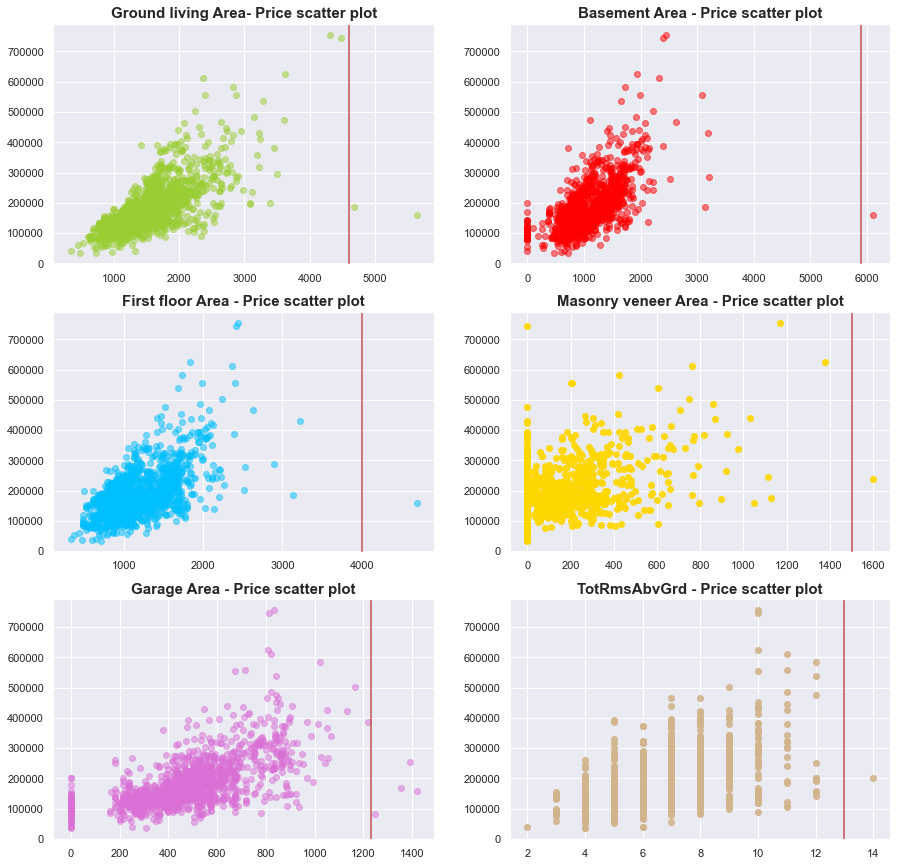

In [49]:
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=df_train['GrLivArea'], y=df_train['SalePrice'], color=('yellowgreen'), alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Ground living Area- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=df_train['TotalBsmtSF'], y=df_train['SalePrice'], color=('red'),alpha=0.5)
plt.axvline(x=5900, color='r', linestyle='-')
plt.title('Basement Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=df_train['1stFlrSF'], y=df_train['SalePrice'], color=('deepskyblue'),alpha=0.5)
plt.axvline(x=4000, color='r', linestyle='-')
plt.title('First floor Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x=df_train['MasVnrArea'], y=df_train['SalePrice'], color=('gold'),alpha=0.9)
plt.axvline(x=1500, color='r', linestyle='-')
plt.title('Masonry veneer Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,0))
plt.scatter(x=df_train['GarageArea'], y=df_train['SalePrice'], color=('orchid'),alpha=0.5)
plt.axvline(x=1230, color='r', linestyle='-')
plt.title('Garage Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,1))
plt.scatter(x=df_train['TotRmsAbvGrd'], y=df_train['SalePrice'], color=('tan'),alpha=0.9)
plt.axvline(x=13, color='r', linestyle='-')
plt.title('TotRmsAbvGrd - Price scatter plot', fontsize=15, weight='bold' )
plt.show()

The outliers are the points in the right that have a larger area or value but a very low sale price. We localize those points by sorting their respective columns
 * Interesting! The outlier in "basement" and "first floor" features is the same as the first outlier in ground living area: The outlier with index number 1298.

### 5.2 Outliers localization:

We sort the columns containing the outliers shown in the graph, we will use the function head() to show the outliers: head(number of outliers or dots shown in each plot)

In [50]:
df_train['GrLivArea'].sort_values(ascending=False).head(2)

1298    5642
523     4676
Name: GrLivArea, dtype: int64

In [51]:
df_train['TotalBsmtSF'].sort_values(ascending=False).head(1)

1298    6110
Name: TotalBsmtSF, dtype: int64

In [52]:
df_train['MasVnrArea'].sort_values(ascending=False).head(1)

297    1600.0
Name: MasVnrArea, dtype: float64

In [53]:
df_train['1stFlrSF'].sort_values(ascending=False).head(1)

1298    4692
Name: 1stFlrSF, dtype: int64

In [54]:
df_train['GarageArea'].sort_values(ascending=False).head(4)

1298    1418
581     1390
1190    1356
1061    1248
Name: GarageArea, dtype: int64

In [55]:
df_train['TotRmsAbvGrd'].sort_values(ascending=False).head(1)

635    14
Name: TotRmsAbvGrd, dtype: int64

We can safely remove those points.

In [56]:
train=Train[(Train['GrLivArea'] < 4600) & (Train['MasVnrArea'] < 1500)]

print('We removed ',Train.shape[0]- train.shape[0],'outliers')

We removed  3 outliers


We do the same thing with "SalePrice" Target values column, we localize those outliers and make sure they are the right outliers to remove.

They both have the same price range as the detected outliers. So, we can safely drop them.

In [57]:
target=df_train[['SalePrice']]
target.loc[1298]

SalePrice    160000
Name: 1298, dtype: int64

In [58]:
target.loc[523]

SalePrice    184750
Name: 523, dtype: int64

We gather all the outliers index positions and drop them from the target dataset

In [59]:
#pos = [1298,523, 297, 581, 1190, 1061, 635, 197,1328, 495, 583, 313, 335, 249, 706]
pos = [1298,523, 297]
target.drop(target.index[pos], inplace=True)


P.S. I didn't drop all the outliers because dropping all of them led to a worst RMSE score. More investigation is needed to filter those outliers.

In [60]:
print('We make sure that both train and target sets have the same row number after removing the outliers:')
print( 'Train: ',train.shape[0], 'rows')
print('Target:', target.shape[0],'rows')

We make sure that both train and target sets have the same row number after removing the outliers:
Train:  1457 rows
Target: 1457 rows


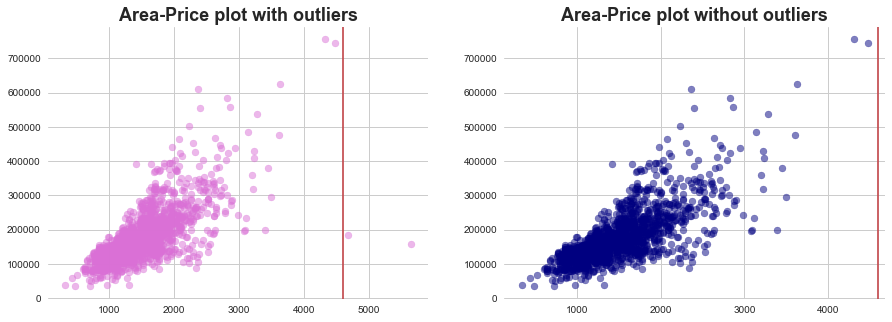

In [61]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.scatter(x=df_train['GrLivArea'], y=df_train['SalePrice'], color=('orchid'), alpha=0.5)
plt.title('Area-Price plot with outliers',weight='bold', fontsize=18)
plt.axvline(x=4600, color='r', linestyle='-')
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.scatter(x=train['GrLivArea'], y=target['SalePrice'], color='navy', alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Area-Price plot without outliers',weight='bold', fontsize=18)
plt.show()

## Log transform skewed numeric features:
Log transform skewed numeric features:
We want our skewness value to be around 0 and kurtosis less than 3. For more information about skewness and kurtosis,I recommend reading this article.

Here are two examples of skewed features: Ground living area and 1st floor SF. We will apply np.log1p to the skewed variables.

NOT Skewness basically gives the shape of normal distribution of values.

If skewness value lies above +1 or below -1, data is highly skewed. If it lies between +0.5 to -0.5, it is moderately skewed. If the value is 0, then the data is symmetric

### Positively skewed data:
If tail is on the right as that of the second image in the figure, it is right skewed data. It is also called positive skewed data.

### Negatively skewed data:
If the tail is to the left of data, then it is called left skewed data. It is also called negatively skewed data.

[codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa](http://)

In [62]:
print("Skewness before log transform: ", df_train['GrLivArea'].skew())
print("Kurtosis before log transform: ", df_train['GrLivArea'].kurt())

Skewness before log transform:  1.3665603560164552
Kurtosis before log transform:  4.895120580693174


In [63]:
from scipy.stats import skew

#numeric_feats = c.dtypes[c.dtypes != "object"].index

#skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
#skewed_feats
#skewed_feats = skewed_feats[skewed_feats > 0.75]
#skewed_feats = skewed_feats.index

#train[skewed_feats] = np.log1p(train[skewed_feats])

In [64]:
print("Skewness after log transform: ", train['GrLivArea'].skew())
print("Kurtosis after log transform: ", train['GrLivArea'].kurt())

Skewness after log transform:  1.0127645385480262
Kurtosis after log transform:  2.0672339304153655


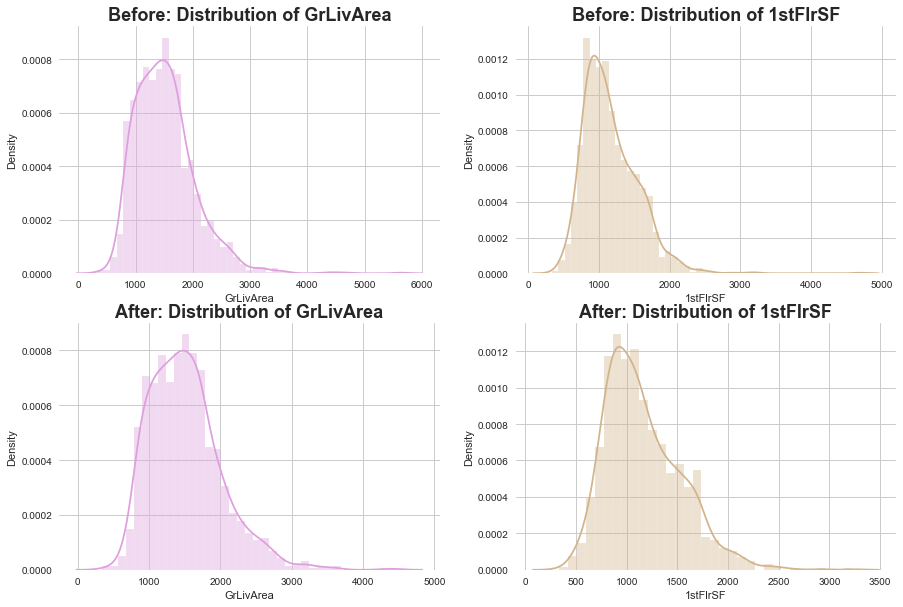

In [65]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,10))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((2,2),(0,0))
sns.distplot(df_train.GrLivArea, color='plum')
plt.title('Before: Distribution of GrLivArea',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((2,2),(0,1))
sns.distplot(df_train['1stFlrSF'], color='tan')
plt.title('Before: Distribution of 1stFlrSF',weight='bold', fontsize=18)


ax1 = plt.subplot2grid((2,2),(1,0))
sns.distplot(train.GrLivArea, color='plum')
plt.title('After: Distribution of GrLivArea',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((2,2),(1,1))
sns.distplot(train['1stFlrSF'], color='tan')
plt.title('After: Distribution of 1stFlrSF',weight='bold', fontsize=18)
plt.show()

Last thing to do before Machine Learning is to log transform the target as well, as we did with the skewed features.

P.S. Log transoform is only applied on the target in this version, not on the features. I will be applying the log transoform on the features in future versions of this kernel

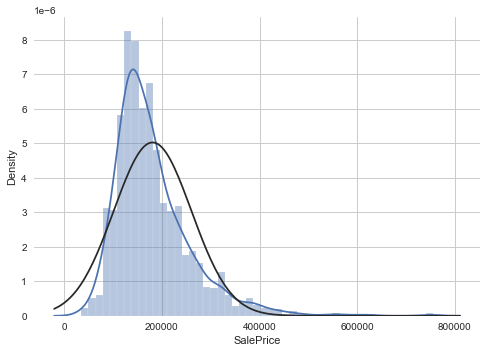

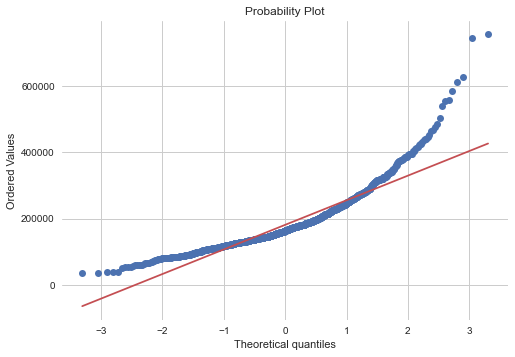

In [66]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [67]:
print("Skewness before log transform: ", target['SalePrice'].skew())
print("Kurtosis before log transform: ",target['SalePrice'].kurt())

Skewness before log transform:  1.8829247000823222
Kurtosis before log transform:  6.527120338179705


In [68]:
#log transform the target:
target["SalePrice"] = np.log1p(target["SalePrice"])

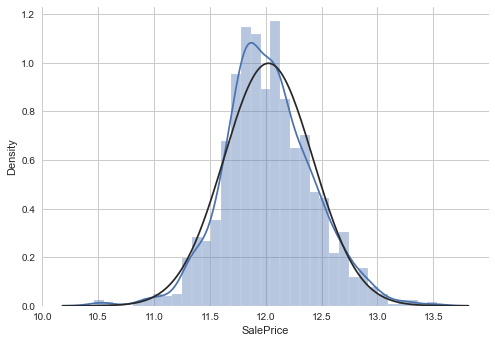

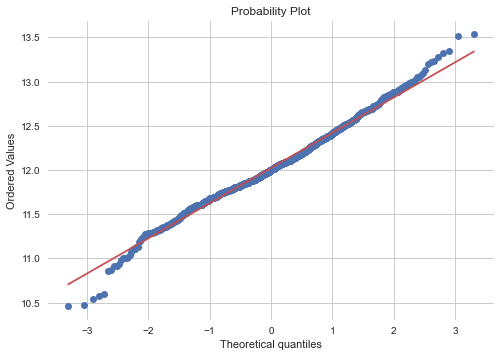

In [69]:
#transformed histogram and normal probability plot
sns.distplot(target["SalePrice"], fit=norm);
fig = plt.figure()
res = stats.probplot(target["SalePrice"], plot=plt)

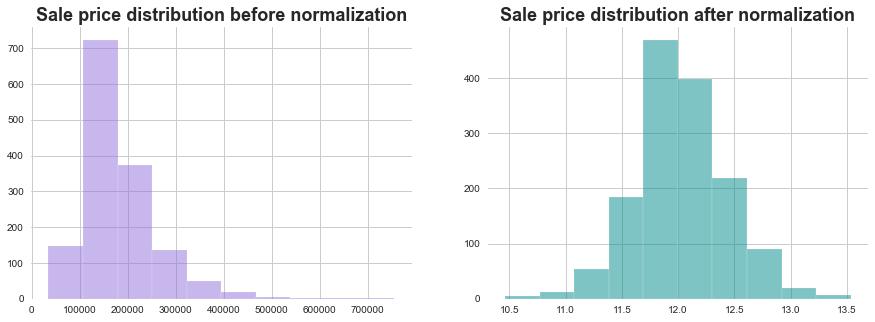

In [70]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.hist(df_train.SalePrice, bins=10, color='mediumpurple',alpha=0.5)
plt.title('Sale price distribution before normalization',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.hist(target.SalePrice, bins=10, color='darkcyan',alpha=0.5)
plt.title('Sale price distribution after normalization',weight='bold', fontsize=18)
plt.show()

In [71]:
print("Skewness after log transform: ", target['SalePrice'].skew())
print("Kurtosis after log transform: ",target['SalePrice'].kurt())

Skewness after log transform:  0.12299462625722293
Kurtosis after log transform:  0.8062416349541661


The skewness and kurtosis values look fine after log transform. We can now move forward to Machine Learning.

P.S.To get our original SalePrice values back, we will apply
###  np.expm1
at the end of the study to cancel the log1p transformation after training and testing the models.

 Note!! the clean from missing values and apply  Feature Engineering  Required Combine between train and test sets
 and and clean outliers apply only training set

# 6- Machine Learning:

#### Note: We start machine learning by setting the features and target:

* Features: x
* Target: y

In [72]:
X=train
y=np.array(target)

In [73]:
print(X.shape)    # features variable afte clean and feature engineering and clean outliers
print(y.shape)    # target varible afte clean and and scaling using log transform
print(Test.shape) # test set after cleaning and feature engineering but Do not apply clean outliers and Scaling on it

(1457, 302)
(1457, 1)
(1459, 302)


### 6.1 Preprocessing

In [74]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.simplefilter(action='ignore')

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm

### Then, we split them to train and test sets

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = .3, random_state=0)

#### We use RobustScaler to scale our data because it's powerful against outliers
#### we already detected some but there must be some other outliers out there

In [76]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
# transform "x_train"
x_train = scaler.fit_transform(x_train)
# transform "x_test"
x_test = scaler.transform(x_test)

#Transform the test set
X_test= scaler.transform(Test)

#### We first start by trying the very basic regression model: Linear regression.

##### We use 5- Fold cross validation for a better error estimate:

### 6.2 Linear regression

In [77]:
from sklearn.linear_model import LinearRegression

lreg=LinearRegression()
MSEs=ms.cross_val_score(lreg,X , y, scoring='neg_mean_squared_error', cv=5)
meanMSE=np.mean(MSEs)
print(meanMSE)
print('RMSE = '+str(math.sqrt(-meanMSE)))


-1801343.1340272992
RMSE = 1342.141249655676


###### Our goal is to minimize the error, we use regularization methods: Ridge, Lasso and ElasticNet, in order to lower the squared error

### 6.3 Regularization:

#### Ridge regression: 
      * Minimize squared error + a term alpha that penalizes the error
      * We need to find a value of alpha that minimizes the train and test error (avoid overfitting)
      * it use L2

In [78]:
import sklearn.model_selection as GridSearchCV # to get more great Hypert pramater value
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg=ms.GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
ridge_reg.fit(x_train,y_train)
print("The best value of Alpha is: ",ridge_reg.best_params_)
print("The best score achieved with Alpha=11 is: ",math.sqrt(-ridge_reg.best_score_))
ridge_pred=math.sqrt(-ridge_reg.best_score_)

The best value of Alpha is:  {'alpha': 20}
The best score achieved with Alpha=11 is:  0.11471475752277974


In [79]:
ridge_mod=Ridge(alpha=20)
ridge_mod.fit(x_train,y_train)
y_pred_train=ridge_mod.predict(x_train)
y_pred_test=ridge_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test))))  

Root Mean Square Error train = 0.09478205809076456
Root Mean Square Error test = 0.11466217080528404


#### Lasso regression
* Next we try Lasso regularization: Similar procedure as ridge regularization but Lasso tends to have a lot of 0 entries in it and just few nonzeros (easy selection). * In other words, lasso drops the uninformative features and keeps just the important ones.
* As with Ridge regularization, we need to find the alpha parameter that penalizes the error
* it use L1

In [80]:
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}


lasso=Lasso()
lasso_reg=ms.GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(x_train,y_train)

print('The best value of Alpha is: ',lasso_reg.best_params_)

The best value of Alpha is:  {'alpha': 0.0009}


In [81]:
lasso_mod=Lasso(alpha=0.0009)
lasso_mod.fit(x_train,y_train)
y_lasso_train=lasso_mod.predict(x_train)
y_lasso_test=lasso_mod.predict(x_test)

print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_lasso_test))))

Root Mean Square Error train = 0.09943124664418136
Root Mean Square Error test = 0.11161013873369141


* We check next, the important features that our model used to make predictions
* The number of uninformative features that were dropped. Lasso give a 0 coefficient to the useless features, we will use the coefficient given to the important feature to plot the graph

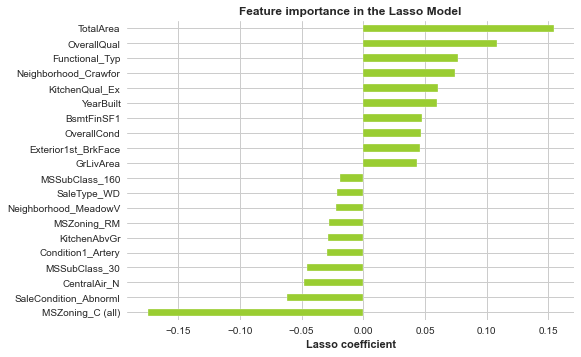

In [82]:
coefs = pd.Series(lasso_mod.coef_, index = X.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("Lasso coefficient", weight='bold')
plt.title("Feature importance in the Lasso Model", weight='bold')
plt.show()

Nice! The most important feature is the new feature we created "TotalArea".

Other features such as neighborhood or overall quality are among the main important features.

In [83]:
print("Lasso kept ",sum(coefs != 0), "important features and dropped the other ", sum(coefs == 0)," features")

Lasso kept  87 important features and dropped the other  215  features


Next, we try ElasticNet. A regressor that combines both ridge and Lasso. We use cross validation to find:

Alpha
Ratio between Ridge and Lasso, for a better combination of both

### ElasticNet:

In [84]:
from sklearn.linear_model import ElasticNetCV

alphas = [10,1,0.1,0.01,0.001,0.002,0.003,0.004,0.005,0.00054255]
l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

elasticmod = elastic_cv.fit(x_train, y_train.ravel())
ela_pred=elasticmod.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, ela_pred))))
print(elastic_cv.alpha_)
print(elastic_cv.l1_ratio_)

Root Mean Square Error test = 0.11201319993889058
0.00054255
1.0


In [85]:
#REGULARIZATION RECAP

## REGULARIZATION RECAP

In [86]:
print(y.shape)
print(X.shape)

(1457, 1)
(1457, 302)


##### In regularization we worked with 3 algorithms: Ridge (L2), Lasso (L1) and ElasticNet that is a combination of both L2 and L1 regressors. 
##### Before moving to the next section of this work, I would like to introduce a function that does all the work we did above in details just with one line of code. 
##### The function does all the regression pipeline:

1-Split the data to train/test
2-Scale the data
3-Gridsearch for the best hyperparameters
4-Predict the target
5-Evaluate the prediction

##### The function takes as input parameters:

* x: the features
* y: the target
* modelo: Ridge(default), Lasso, ElasticNetCV
* scaler: RobustScaler(default), MinMaxScaler, StandardScaler

define some helper functions, which would be used repeatedly

In [87]:
# create a function that would split data into training and testing
def split_data(features, target):
    
    from sklearn.model_selection import train_test_split
    
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)
    
    return x_train, x_test, y_train, y_test

In [88]:
# helper function to evaluate different scores
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error
def get_score(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmsle = mean_squared_log_error(y_test, y_pred) 
    return (r2, mse, rmse, rmsle)

In [89]:
# function to Plot the Actual vs Predicted Sale Prices
def plot_data(y_test, y_pred):
    plt.figure(figsize=(18,12))
    plt.plot(y_test.values, label='Actual', c='r')
    plt.plot(y_pred, label='Predicted', c='b')
    plt.title('Actual vs Predicted Sale Price of the House')
    plt.ylabel('Sale Price')
    plt.legend()

In [90]:
def regularization(x,y,modelo=Ridge, scaler=RobustScaler):
    """"
    Function to automate regression with regularization techniques.
    x expects the features
    y expects the target
    modelo: Ridge(default), Lasso, ElasticNetCV
    scaler: RobustScaler(default), MinMaxSclaer, StandardScaler
    SOURCE: https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking
    Contact: amineyamlahi@gmail.com
    """
    #Split the data to train/test
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .3, random_state=0)
    
    #Scale the data. RobustSclaer default
    from sklearn.preprocessing import RobustScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    
    scaler= scaler()
    # transform "x_train"
    x_train = scaler.fit_transform(x_train)
    # transform "x_test"
    x_test = scaler.transform(x_test)
    #Transform the test set
    X_test= scaler.transform(Test)
    
    if modelo != ElasticNetCV:
        if modelo == Ridge:
            parameters= {'alpha':[x for x in range(1,101)]}
        elif modelo == Lasso:
            parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}
            
        model=modelo()
            
        model=ms.GridSearchCV(model, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
        model.fit(x_train,y_train)
        y_pred= model.predict(x_test)

        #print("The best value of Alpha is: ",model.best_params_)
        print("The best RMSE score achieved with %s is: %s " %(model.best_params_,
                  str(math.sqrt(sklm.mean_squared_error(y_test, y_pred)))))
    elif modelo == ElasticNetCV:
        alphas = [0.000542555]
        l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

        elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

        elasticmod = elastic_cv.fit(x_train, y_train.ravel())
        ela_pred=elasticmod.predict(x_test)
        print("The best RMSE score achieved with alpha %s and l1_ratio %s is: %s "
              %(elastic_cv.alpha_,elastic_cv.l1_ratio_,
            str(math.sqrt(sklm.mean_squared_error(y_test, ela_pred)))))
        
            


#### 6.4 XGB and ExtraTrees regressors:

We will try other kind of regressors, such as XGBRegressor and ExtraTreesRegressor

In [91]:
from xgboost.sklearn import XGBRegressor

#xg_reg = XGBRegressor()
#xgparam_grid= {'learning_rate' : [0.01],'n_estimators':[2000, 3460, 4000],
#                                     'max_depth':[3], 'min_child_weight':[3,5],
#                                     'colsample_bytree':[0.5,0.7],
#                                     'reg_alpha':[0.0001,0.001,0.01,0.1,10,100],
#                                    'reg_lambda':[1,0.01,0.8,0.001,0.0001]}

#xg_grid=GridSearchCV(xg_reg, param_grid=xgparam_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
#xg_grid.fit(x_train,y_train)
#print(xg_grid.best_estimator_)
#print(xg_grid.best_score_)

In [92]:
xgb= XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=0, missing=None, n_estimators=4000,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0.0001, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgmod=xgb.fit(x_train,y_train)
xg_pred=xgmod.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, xg_pred))))

Root Mean Square Error test = 0.11424924855417323


#### 6.5 ENSEMBLE METHODS:
   * VOTING REGRESSOR:
   
        ** A voting regressor is an ensemble meta-estimator that fits base regressors each on the whole dataset. It, then, averages the individual predictions to form                 a final prediction.    

In [93]:
from sklearn.ensemble import VotingRegressor

vote_mod = VotingRegressor([('Ridge', ridge_mod), ('Lasso', lasso_mod), ('Elastic', elastic_cv), 
                            ('XGBRegressor', xgb)])
vote= vote_mod.fit(x_train, y_train.ravel())
vote_pred=vote.predict(x_test)

print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, vote_pred))))

Root Mean Square Error test = 0.10879130231439238


#### 6.5 Gradient Boosted Regressor

# baseline Gradient Boosted Regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor()

x_train, x_test, y_train, y_test = split_data(X, y)

gbr_model.fit(x_train, y_train)

y_pred = gbr_model.predict(x_test)

r2, mse, rmse, rmsle = get_score(y_test, y_pred)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred))))



Grid Search for hyperparameter tuning

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# warm_start = store and reuse previous fit values
# n_iter_no_change = used for early stopping, terminates the training process if validation score is not improving for this many iterations
grb = GradientBoostingRegressor(warm_start=True, n_iter_no_change=15)
x_train, x_test, y_train, y_test = split_data(X, y)

num_estimators = [100, 250, 500]
learn_rates = [0.05, 0.1]
depths = [3, 5, None]

# test different values of n_estimators to see which one would yield better results
params = {'n_estimators': num_estimators, 'max_depth': depths, 'learning_rate': learn_rates}

# cv = 5 -> 5-fold Cross Validation
grid_search = GridSearchCV(estimator=grb, param_grid=params, cv=5, return_train_score=True)
grid_search.fit(x_train, y_train)

# get the best parameters
grid_search.best_params_

# let's view each model/parameters in detail
# total_size = 3*2*3 = 18
for i in range(18):
    print('Parameters:', grid_search.cv_results_['params'][i])
    print('Mean Test Score:', grid_search.cv_results_['mean_test_score'][i])
    print('Rank', grid_search.cv_results_['rank_test_score'][i])

In [94]:
#Gradient Boosting Regressor with Hyperparameters as per Grid Search

# Gradient Boosting Regressor with Hyperparameters as per Grid Search

hyper_param = grid_search.best_params_

gradient_reg = GradientBoostingRegressor(n_estimators=hyper_param['n_estimators'], max_depth=hyper_param['max_depth'],
                                         learning_rate=hyper_param['learning_rate'])

x_train, x_test, y_train, y_test = split_data(X, y)

gradient_reg.fit(x_train, y_train)

y_pred = gradient_reg.predict(x_test)

r2, mse, rmse, rmsle = get_score(y_test, y_pred)

print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred))))


#### STACKING REGRESSOR:

We stack all the previous models, including the votingregressor with XGBoost as the meta regressor:

In [100]:
from mlxtend.regressor import StackingRegressor


stregr = StackingRegressor(regressors=[elastic_cv,ridge_mod, lasso_mod, vote_mod], 
                           meta_regressor=xgb, use_features_in_secondary=True
                          )

stack_mod=stregr.fit(x_train, y_train.ravel())
stacking_pred=stack_mod.predict(x_test)

print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, stacking_pred))))

Root Mean Square Error test = 0.11039446189465986


Last thing to do is average our regressors and fit them on the testing dataset

#### Averaging Regressors

In [101]:
final_test=(0.3*vote_pred+0.5*stacking_pred+ 0.2*y_lasso_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, final_test))))

Root Mean Square Error test = 0.10808055201215139


Averaging the 3 best models: Stacking, Voting and Lasso gave the best results: The lowest RMSE

The coefficients assigned to the 3 models were tested manually, the models combination above gave the best RMSE score

### 6.6 Fit the model on test data

Now, we fit the models on the test data and then submit it to the competition

  * We apply np.expm1 to cancel the np.logp1 (we did previously in data processing) and convert the numbers to their original form 

In [102]:
#VotingRegressor to predict the final Test
vote_test = vote_mod.predict(X_test)
final1=np.expm1(vote_test)

#StackingRegressor to predict the final Test
stack_test = stregr.predict(X_test)
final2=np.expm1(stack_test)

#LassoRegressor to predict the final Test
lasso_test = lasso_mod.predict(X_test)
final3=np.expm1(lasso_test)

In [103]:
#Submission of the results predicted by the average of Voting/Stacking/Lasso
final=(0.2*final1+0.2*final3)

final_submission = pd.DataFrame({
        "Id": df_test["Id"],
        "SalePrice": final
    })
final_submission.to_csv("final_submission.csv", index=False)
final_submission.head()

,Id,SalePrice
0,1461,47806.118366
1,1462,60556.635367
2,1463,71792.243665
3,1464,79003.763601
4,1465,75441.484107
